# Road Accident Analysis

In [6]:
import pandas as pd 
import numpy as np
import openpyxl

In [8]:
df = pd.read_excel("Road Accident Data.xlsx")

In [9]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


In [10]:
df.isnull().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [11]:
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Accident Date', 'Latitude', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Speed_limit'],
      dtype='object')
Categorical Columns: Index(['Accident_Index', 'Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions', 'Local_Authority_(District)',
       'Carriageway_Hazards', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')


In [12]:
df.duplicated().sum()

1

In [14]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of        Accident_Index Accident Date Day_of_Week              Junction_Control  \
0       200901BS70001    2021-01-01    Thursday      Give way or uncontrolled   
1       200901BS70002    2021-01-05      Monday      Give way or uncontrolled   
2       200901BS70003    2021-01-04      Sunday      Give way or uncontrolled   
3       200901BS70004    2021-01-05      Monday           Auto traffic signal   
4       200901BS70005    2021-01-06     Tuesday           Auto traffic signal   
...               ...           ...         ...                           ...   
307968  201091NM01760    2022-02-18    Thursday  Data missing or out of range   
307969  201091NM01881    2022-02-21      Sunday  Data missing or out of range   
307970  201091NM01935    2022-02-23     Tuesday      Give way or uncontrolled   
307971  201091NM01964    2022-02-23     Tuesday      Give way or uncontrolled   
307972  201091NM02142    2022-02-28      Sunday      Give way or u

In [15]:
df[categorical_columns].describe()

,Accident_Index,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Police_Force,Road_Surface_Conditions,Road_Type,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
count,307973,307973,307973,307973,307973,307973,307973,5424,307973,307656,306439,307956,307973,301916,307973
unique,197644,7,7,9,4,5,422,5,51,5,5,1439,2,8,15
top,2010000000000,Friday,Give way or uncontrolled,Not at junction or within 20 metres,Slight,Daylight,Birmingham,Other object on road,Metropolitan Police,Dry,Single carriageway,17:00:00,Urban,Fine no high winds,Car
freq,110304,50529,150045,123094,263280,227286,6165,2243,46789,208967,230612,2933,198532,244496,239794


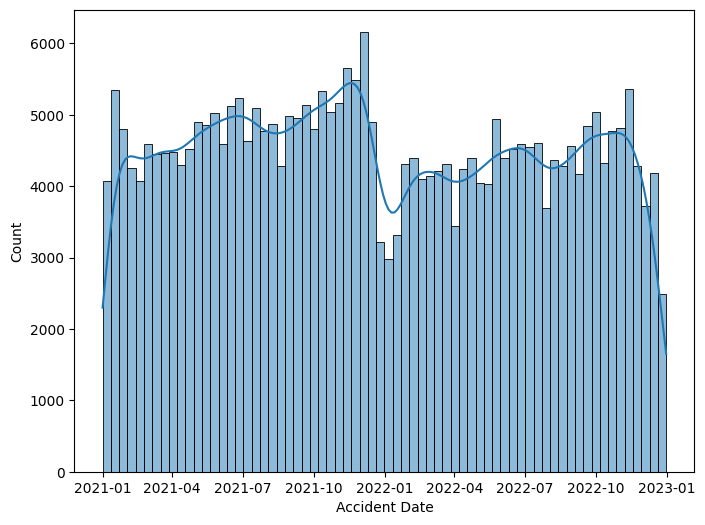

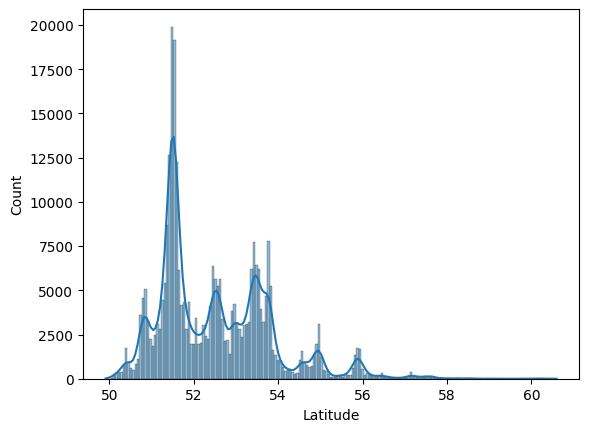

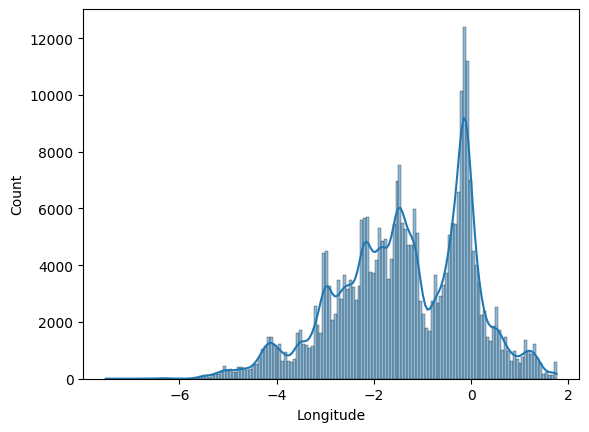

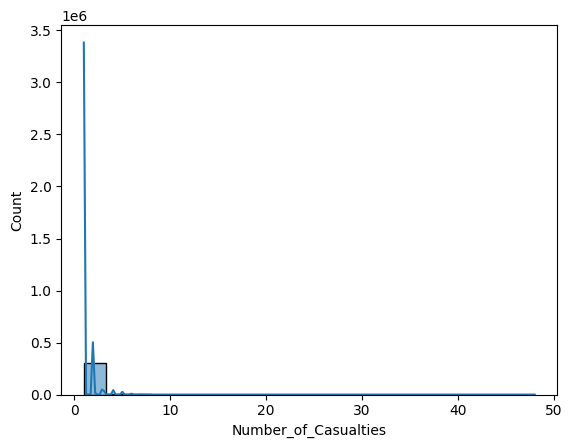

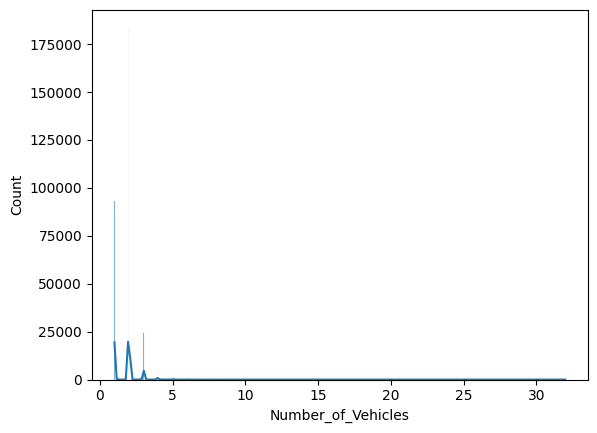

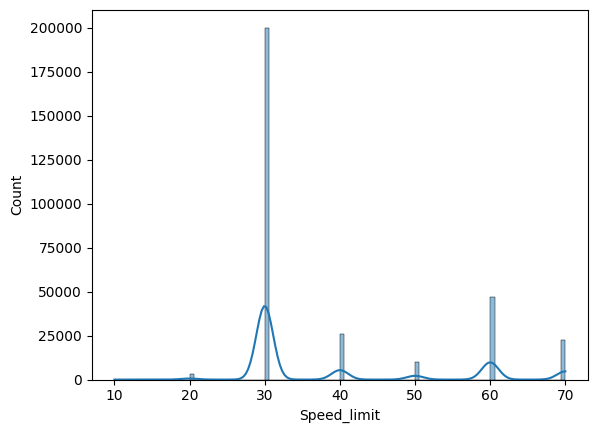

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Axes: >

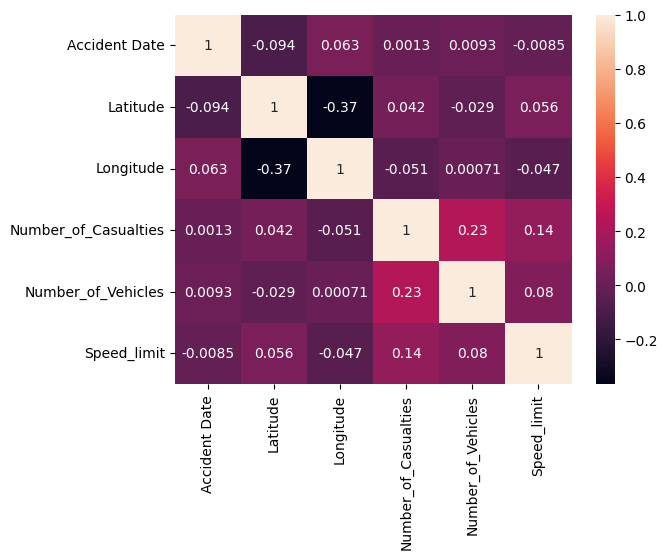

In [17]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [18]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [19]:
imputer= SimpleImputer()

In [24]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median'))
    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent'))
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


NameError: name 'cut_categories' is not defined